In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset CIC Train50

In [2]:
import pickle

In [3]:
with open('df_cic_train50_no_preprocessing_labelencoder', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (961529, 78)
X teste =  (412085, 78)
y multiclasse treino =  (961529,)
y multiclasse teste =  (412085,)
y binário treino =  (961529,)
y binário teste =  (412085,)


In [5]:
X_train50_train.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
586419,24,215,2,2,46,46,23,23,23.0,0.000000,...,1,32,0.0,0.0,0,0,0.0,0.0,0,0
1295441,24,160,2,2,90,122,45,45,45.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
925705,24,60629,1,1,49,161,49,49,49.0,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
865489,27,84839112,6,7,342,11595,324,0,57.0,130.835775,...,3,20,9993.0,0.0,9993,9993,84700000.0,0.0,84700000,84700000
289527,27,5325819,3,1,0,0,0,0,0.0,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0


In [6]:
print(y_train50_multiclass_train.unique())
print(y_train50_binary_train.unique())

['BENIGN' 'DoS' 'DDoS' 'PortScan' 'WebAttack' 'BruteForce' 'BotNet'
 'Infiltration' 'Heartbleed']
[0 1]


In [7]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [9]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset CIC Test50

In [10]:
import pickle

In [3]:
with open('df_cic_test50_no_preprocessing_labelencoder', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [12]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1373614, 78)
y multiclasse =  (1373614,)
y binário =  (1373614,)


In [13]:
y_test50_multiclass.value_counts()

BENIGN          1136548
DoS              126330
PortScan          79464
DDoS              22262
BruteForce         6917
WebAttack          1089
BotNet              982
Infiltration         17
Heartbleed            5
Name: Label_multiclass, dtype: int64

In [14]:
X_test50.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,24,154,2,2,70,102,35,35,35.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,24,60757,2,2,60,248,30,30,30.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
2,24,30266,1,1,56,121,56,56,56.0,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,40027,1,2,0,37,0,37,0,18.5,26.162951,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
4,24,196,2,2,80,336,40,40,40.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [15]:
print(y_test50_multiclass.unique())
print(y_test50_binary.unique())

['BENIGN' 'DoS' 'PortScan' 'DDoS' 'BotNet' 'WebAttack' 'BruteForce'
 'Heartbleed' 'Infiltration']
[0 1]


In [16]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [17]:
X_test50 = X_test50.to_numpy()
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [18]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Algoritmo RandomForest para Train e Validation - Train50

In [19]:
from sklearn.ensemble import RandomForestClassifier

### Predição train50 binária

In [20]:
rforest_train50_binary = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [21]:
rforest_train50_binary.fit(X_train50_train, y_train50_binary_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [22]:
predict_train50_binary = rforest_train50_binary.predict(X_train50_test)

In [23]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9928388560612496

### Visualização da árvore binária

In [26]:
from sklearn import tree
from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

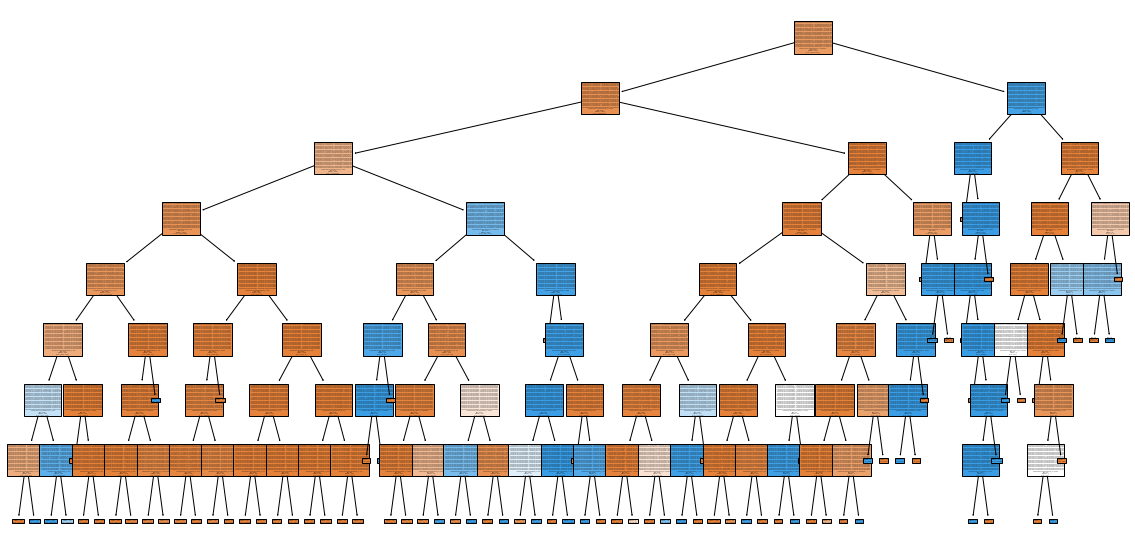

In [27]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_binary.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [47]:
rforest_train50_binary.feature_importances_

array([3.23315338e-02, 1.05903977e-02, 7.70848314e-03, 3.81700596e-03,
       2.12194608e-02, 2.76926027e-02, 1.90492391e-02, 6.61501031e-03,
       1.40111082e-02, 3.25228468e-03, 4.32636787e-02, 1.78774180e-02,
       3.37809523e-02, 4.28064240e-02, 1.79075487e-02, 9.91787172e-03,
       1.09796001e-02, 9.20377250e-03, 1.68847057e-02, 3.29055765e-03,
       5.16650740e-03, 6.25977755e-03, 1.05223441e-02, 4.97892293e-03,
       3.19090379e-03, 2.24040295e-03, 2.74038151e-03, 2.44227319e-03,
       9.66289699e-04, 1.46366940e-03, 8.97039615e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.63747633e-02, 9.11952340e-03,
       7.50262961e-03, 1.21424214e-02, 1.05891769e-02, 7.05513905e-02,
       2.86247633e-02, 6.71810024e-02, 5.63914675e-02, 8.60751707e-04,
       1.19762922e-03, 4.19070699e-07, 2.08681168e-02, 1.69905293e-02,
       2.16531779e-03, 0.00000000e+00, 0.00000000e+00, 2.11646857e-03,
       4.93518797e-02, 2.49129547e-02, 6.10677015e-02, 1.94114627e-02,
      

In [48]:
#viz = dtreeviz(rforest_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

### Predição train50 multiclasse

In [49]:
rforest_train50_multiclass = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [50]:
rforest_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [51]:
predict_train50_multiclass = rforest_train50_multiclass.predict(X_train50_test)

In [52]:
predict_train50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [53]:
y_train50_multiclass_test

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [54]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9920477571374837

### Visualização da árvore multiclasse

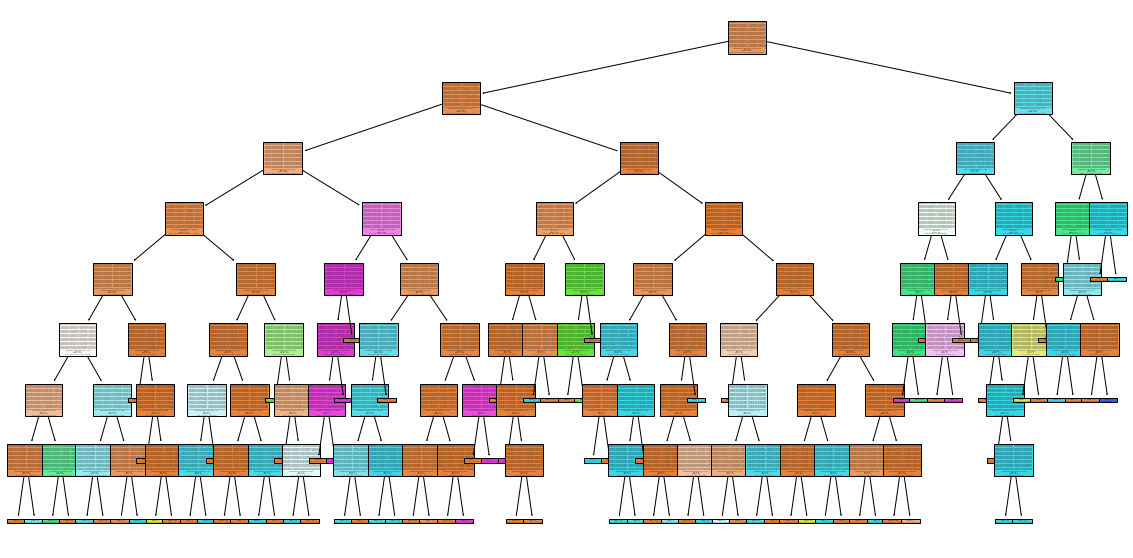

In [55]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_multiclass.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [57]:
rforest_train50_multiclass.feature_importances_

array([3.31410951e-02, 8.76017083e-03, 8.07508606e-03, 6.04403453e-03,
       1.84516541e-02, 3.29157031e-02, 2.57194110e-02, 7.99322277e-03,
       1.65358545e-02, 6.87153976e-03, 4.27952559e-02, 1.24139557e-02,
       3.51085307e-02, 3.25013949e-02, 2.11001859e-02, 8.33384399e-03,
       1.19127618e-02, 1.02974338e-02, 1.91507284e-02, 3.02384223e-03,
       5.08291002e-03, 7.46440280e-03, 1.25271707e-02, 5.50429442e-03,
       3.55195836e-03, 2.13379706e-03, 1.29255890e-03, 2.00338195e-03,
       2.60482730e-03, 1.19883420e-03, 1.02931507e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.77104294e-02, 1.27977057e-02,
       8.75212834e-03, 2.50135969e-02, 1.46467364e-02, 5.95501323e-02,
       2.35610935e-02, 5.96639739e-02, 5.26892197e-02, 1.01544499e-03,
       5.82183147e-04, 3.03932146e-07, 2.30226259e-02, 1.45899855e-02,
       1.26264078e-03, 0.00000000e+00, 2.23000361e-07, 6.03079084e-04,
       4.72754634e-02, 1.86937560e-02, 5.43710728e-02, 1.52885733e-02,
      

In [58]:
#viz = dtreeviz(rforest_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

### Precision e Recall do train50

In [59]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.991563  0.999853  0.995691    340990
           1   0.999267  0.959195  0.978821     71095

    accuracy                       0.992839    412085
   macro avg   0.995415  0.979524  0.987256    412085
weighted avg   0.992892  0.992839  0.992781    412085



In [60]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.990627  0.999850  0.995217    340990
      BotNet   1.000000  0.013652  0.026936       293
  BruteForce   1.000000  0.999520  0.999760      2084
        DDoS   0.999698  0.997593  0.998645      6647
         DoS   0.998614  0.935396  0.965972     37753
Infiltration   1.000000  0.000000  0.000000         4
    PortScan   1.000000  0.993043  0.996509     24004
   WebAttack   1.000000  0.000000  0.000000       310

    accuracy                       0.992048    412085
   macro avg   0.998617  0.617382  0.622880    412085
weighted avg   0.992112  0.992048  0.991245    412085



### Cross Validation do train50

In [61]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(rforest_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [62]:
score_cv_train50_binary

array([0.99315674, 0.99310474, 0.99283434, 0.99273034, 0.99250153,
       0.99252233, 0.99268874, 0.99307354, 0.99283434, 0.99250146])

In [63]:
cv_result_train50_binary

[0.9927948087958317]

In [64]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(rforest_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [65]:
score_cv_train50_multiclass

array([0.99267834, 0.99265754, 0.99237673, 0.99256393, 0.99204393,
       0.99212713, 0.99240793, 0.99251193, 0.99228313, 0.99208545])

In [66]:
cv_result_train50_multiclass

[0.9923736046565871]

### Matriz de Confusão do train50

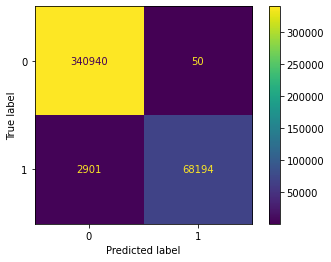

In [67]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

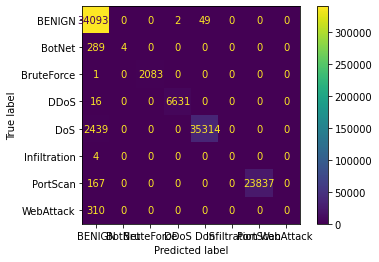

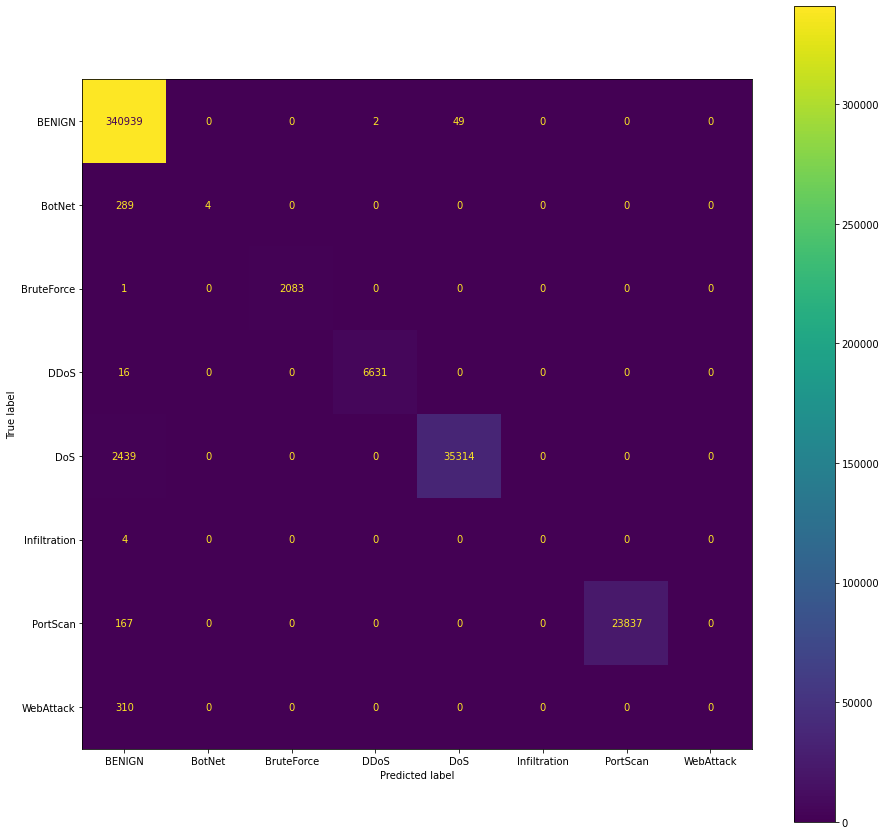

In [68]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)

# Algoritmo RandomForest para Test50

### Predição Test50 binária

In [69]:
predict_test50_binary = rforest_train50_binary.predict(X_test50)

In [70]:
predict_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [71]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [72]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.992839327496662

### Predição test50 multiclasse

In [73]:
predict_test50_multiclass = rforest_train50_multiclass.predict(X_test50)

In [74]:
predict_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'PortScan'],
      dtype=object)

In [75]:
y_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'PortScan'],
      dtype=object)

In [76]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9920974888141793

### Precision e Recall do test50

In [77]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.991581  0.999835  0.995691   1136548
           1   0.999174  0.959302  0.978832    237066

    accuracy                       0.992839   1373614
   macro avg   0.995378  0.979569  0.987262   1373614
weighted avg   0.992892  0.992839  0.992781   1373614



In [78]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.990706  0.999828  0.995246   1136548
      BotNet   1.000000  0.027495  0.053518       982
  BruteForce   1.000000  0.998988  0.999494      6917
        DDoS   0.999370  0.997440  0.998404     22262
         DoS   0.998473  0.936610  0.966553    126330
  Heartbleed   1.000000  1.000000  1.000000         5
Infiltration   1.000000  0.000000  0.000000        17
    PortScan   1.000000  0.993368  0.996673     79464
   WebAttack   1.000000  0.000000  0.000000      1089

    accuracy                       0.992097   1373614
   macro avg   0.998728  0.661525  0.667765   1373614
weighted avg   0.992160  0.992097  0.991288   1373614



### Matriz de Confusão do test50

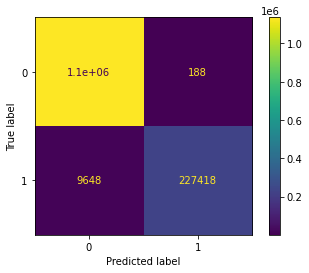

In [79]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_test50, y_test50_binary)
plt.show()

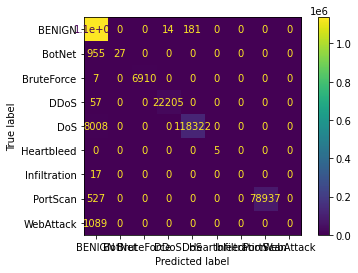

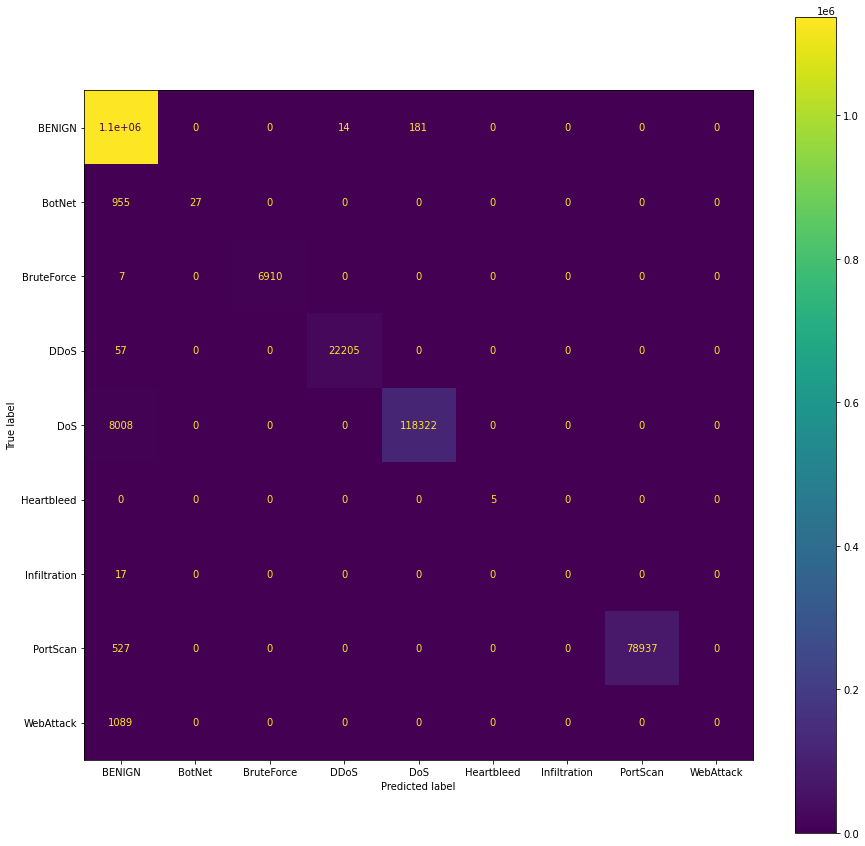

In [80]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)